In [51]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import scipy.stats as stats

In [52]:
output = "NBA_output.csv"
df = pd.read_csv(output)
df = df.drop(df.columns[[0]], axis=1)
df.head()

,Player Id,Full Name,Age,Years Pro,Position,Factor,NBA Salary
0,17,Justin Anderson,25.7,4,G-F,-28.632562,2516048
1,49,DeAndre' Bembry,25.0,3,G-F,10.801852,1634640
2,94,Vince Carter,42.5,21,G-F,-2.526068,1512601
3,119,Allen Crabbe,27.3,6,G-F,-14.052688,18500000
4,281,Damian Jones,24.0,3,C,0.000000,1544951


# WE DID AN ANOVA ANALISIS TO CHECK IF THE FACTOR WAS STATISTICALLY SIGNIFICANT BETWEEN POSICIONS

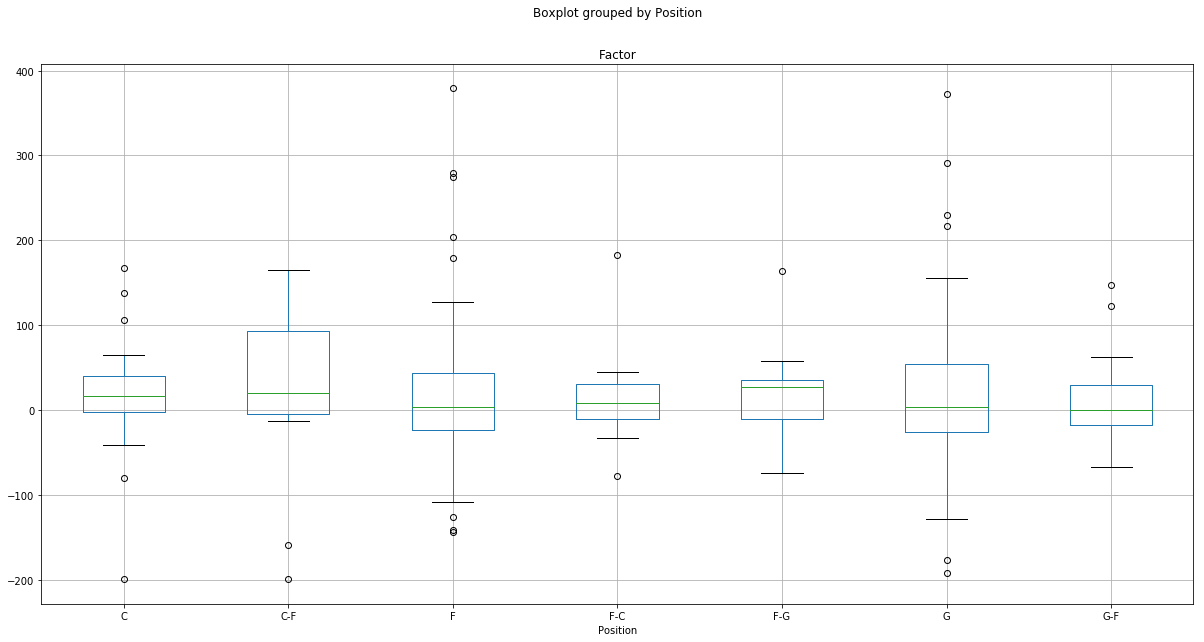

In [54]:
df.boxplot("Factor", by="Position", figsize=(20, 10))

In [55]:
# Extract individual groups
group1 = df[df["Position"] == "C"]["Factor"]
group2 = df[df["Position"] == "G-F"]["Factor"]
group3 = df[df["Position"] == "F"]["Factor"]
group4 = df[df["Position"] == "F-C"]["Factor"]
group5 = df[df["Position"] == "F-G"]["Factor"]
group6 = df[df["Position"] == "G"]["Factor"]
group7 = df[df["Position"] == "G-F"]["Factor"]

In [56]:
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=0.023773335533877414, pvalue=0.9999415220017865)

In [57]:
#df["Position"].replace("G-F", "G", inplace=True)
#df["Position"].replace("F-C", "F", inplace=True)
#df["Position"].replace("C-F", "C", inplace=True)
#df["Position"].replace("F-G", "F", inplace=True)

In [58]:
#df["Position"].value_counts()

In [59]:
df.head()

,Player Id,Full Name,Age,Years Pro,Position,Factor,NBA Salary
0,17,Justin Anderson,25.7,4,G-F,-28.632562,2516048
1,49,DeAndre' Bembry,25.0,3,G-F,10.801852,1634640
2,94,Vince Carter,42.5,21,G-F,-2.526068,1512601
3,119,Allen Crabbe,27.3,6,G-F,-14.052688,18500000
4,281,Damian Jones,24.0,3,C,0.000000,1544951


In [60]:
# Create a new DataFrame that looks into a specific neighborhood
g_df = df.loc[df["Position"] == "G"]
g_df.head()

,Player Id,Full Name,Age,Years Pro,Position,Factor,NBA Salary
10,75,Jaylen Brown,22.7,3,G,35.638333,5169960
13,486,Marcus Smart,25.4,5,G,58.998625,11660716
14,538,Kemba Walker,29.2,8,G,73.266111,12000000
17,142,Spencer Dinwiddie,26.3,5,G,-5.673397,1656092
21,261,Kyrie Irving,27.3,8,G,141.125833,20099189


In [61]:
# Extract individual groups
group1 = df[df["Position"] == "C"]["Factor"]
group2 = df[df["Position"] == "G-F"]["Factor"]
group3 = df[df["Position"] == "F"]["Factor"]
group4 = df[df["Position"] == "F-C"]["Factor"]
group5 = df[df["Position"] == "F-G"]["Factor"]
group6 = df[df["Position"] == "G"]["Factor"]
group7 = df[df["Position"] == "G-F"]["Factor"]

In [62]:
df.head()

,Player Id,Full Name,Age,Years Pro,Position,Factor,NBA Salary
0,17,Justin Anderson,25.7,4,G-F,-28.632562,2516048
1,49,DeAndre' Bembry,25.0,3,G-F,10.801852,1634640
2,94,Vince Carter,42.5,21,G-F,-2.526068,1512601
3,119,Allen Crabbe,27.3,6,G-F,-14.052688,18500000
4,281,Damian Jones,24.0,3,C,0.000000,1544951


# BECAUSE SIMPLY BETWEEN POSITIONS IT WAS NOT STATISTICALLY SIGNIFICANT - WE CHECKED TO SEE IF THERE WAS ANOTHER FACTOR THAT WE HAD EXTRACTED THAT COULD DIFFIRENTIATE THE GROUPS

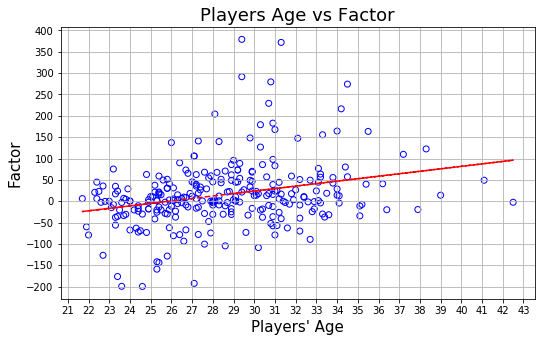

In [63]:
x = df["Age"]
y = df["Factor"]

x_axis = np.arange(21, 44)
y_axis = np.arange(-200, 450, 50)

plt.scatter(x, y, facecolors = "none", edgecolors = "blue")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title("Players Age vs Factor", fontsize='18')

fig = plt.gcf()
fig.set_size_inches(8.5, 5)
plt.xticks(x_axis)
plt.yticks(y_axis)
plt.xlabel("Players' Age", fontsize = 15)
plt.ylabel("Factor", fontsize = 15)
plt.grid()
plt.savefig("agefactor.png")
plt.show()

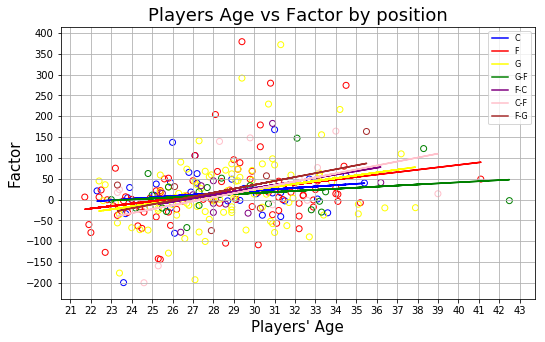

In [64]:
c = df.loc[df["Position"] == "C"]
f = df.loc[df["Position"] == "F"]
g = df.loc[df["Position"] == "G"]
gf = df.loc[df["Position"] == "G-F"]
fc = df.loc[df["Position"] == "F-C"]
cf = df.loc[df["Position"] == "C-F"]
fg = df.loc[df["Position"] == "F-G"]

x1 = c["Age"]
y1 = c["Factor"] 
x2 = f["Age"]
y2 = f["Factor"]
x3 = g["Age"]
y3 = g["Factor"]
x4 = gf["Age"]
y4 = gf["Factor"]
x5 = fc["Age"]
y5 = fc["Factor"]
x6 = cf["Age"]
y6 = cf["Factor"]
x7 = fg["Age"]
y7 = fg["Factor"]

plt.scatter(x1, y1, facecolors = "none", edgecolors = "blue")
fig2 = plt.gcf()
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"b-")

ax2 = fig2.add_subplot(111)
ax2.scatter(x2, y2, facecolors = "none", edgecolors = "red")
z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)
plt.plot(x2,p2(x2),"r-")

ax3 = fig2.add_subplot(111)
ax3.scatter(x3, y3, facecolors = "none", edgecolors = "yellow")
z3 = np.polyfit(x3, y3, 1)
p3 = np.poly1d(z3)
plt.plot(x3,p3(x3),"-", color = "yellow")

ax4 = fig2.add_subplot(111)
ax4.scatter(x4, y4, facecolors = "none", edgecolors = "green")
z4 = np.polyfit(x4, y4, 1)
p4 = np.poly1d(z4)
plt.plot(x4,p4(x4),"g-") 

ax5 = fig2.add_subplot(111)
ax5.scatter(x5, y5, facecolors = "none", edgecolors = "purple")
z5 = np.polyfit(x5, y5, 1)
p5 = np.poly1d(z5)
plt.plot(x5,p5(x5),"-", color = "purple") 

ax6 = fig2.add_subplot(111)
ax6.scatter(x6, y6, facecolors = "none", edgecolors = "pink")
z6 = np.polyfit(x6, y6, 1)
p6 = np.poly1d(z6)
plt.plot(x6,p6(x6),"-", color = "pink") 

ax7 = fig2.add_subplot(111)
ax7.scatter(x7, y7, facecolors = "none", edgecolors = "brown")
z7 = np.polyfit(x7, y7, 1)
p7 = np.poly1d(z7)
plt.plot(x7,p7(x7),"-", color = "brown") 

plt.xticks(x_axis)
plt.yticks(y_axis)
plt.xlabel("Players' Age", fontsize = 15)
plt.ylabel("Factor", fontsize = 15)

plt.title("Players Age vs Factor by position", fontsize='18')
fig2.set_size_inches(8.5, 5)
positions = ["C", "F", "G", "G-F", "F-C", "C-F", "F-G"]
plt.legend(labels = positions, fontsize = 8)
plt.grid()
plt.savefig("agefactorpos.png")
plt.show()

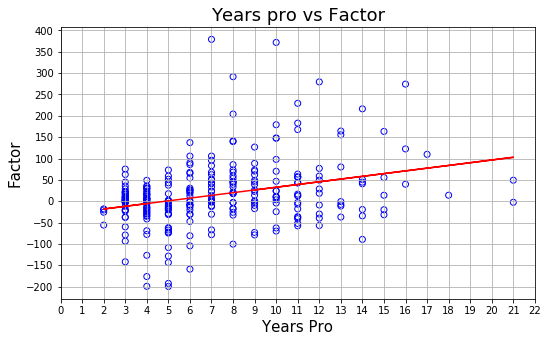

In [65]:
x = df["Years Pro"]
y = df["Factor"]

x_axis = np.arange(0, 23)
y_axis = np.arange(-200, 450, 50)

plt.scatter(x, y, facecolors = "none", edgecolors = "blue")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")

fig3 = plt.gcf()
fig3.set_size_inches(8.5, 5)
plt.title("Years pro vs Factor", fontsize = '18')
plt.xticks(x_axis)
plt.yticks(y_axis)
plt.xlabel("Years Pro", fontsize = 15)
plt.ylabel("Factor", fontsize = 15)
plt.grid()
plt.savefig("profactor.png")
plt.show()

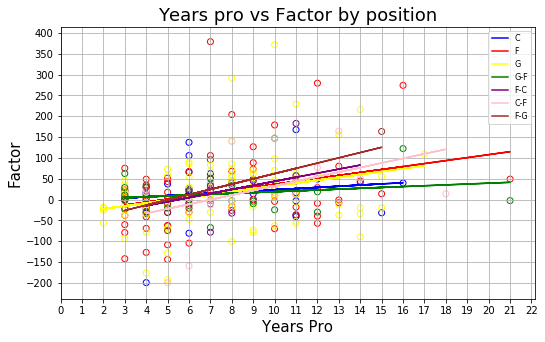

In [66]:
c = df.loc[df["Position"] == "C"]
f = df.loc[df["Position"] == "F"]
g = df.loc[df["Position"] == "G"]
gf = df.loc[df["Position"] == "G-F"]
fc = df.loc[df["Position"] == "F-C"]
cf = df.loc[df["Position"] == "C-F"]
fg = df.loc[df["Position"] == "F-G"]

x_axis = np.arange(0, 23)
y_axis = np.arange(-200, 450, 50)

x1 = c["Years Pro"]
y1 = c["Factor"] 
x2 = f["Years Pro"]
y2 = f["Factor"]
x3 = g["Years Pro"]
y3 = g["Factor"]
x4 = gf["Years Pro"]
y4 = gf["Factor"]
x5 = fc["Years Pro"]
y5 = fc["Factor"]
x6 = cf["Years Pro"]
y6 = cf["Factor"]
x7 = fg["Years Pro"]
y7 = fg["Factor"]

plt.scatter(x1, y1, facecolors = "none", edgecolors = "blue")
fig4 = plt.gcf()
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"b-")

ax2 = fig4.add_subplot(111)
ax2.scatter(x2, y2, facecolors = "none", edgecolors = "red")
z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)
plt.plot(x2,p2(x2),"r-")

ax3 = fig4.add_subplot(111)
ax3.scatter(x3, y3, facecolors = "none", edgecolors = "yellow")
z3 = np.polyfit(x3, y3, 1)
p3 = np.poly1d(z3)
plt.plot(x3,p3(x3),"-", color = "yellow")

ax4 = fig4.add_subplot(111)
ax4.scatter(x4, y4, facecolors = "none", edgecolors = "green")
z4 = np.polyfit(x4, y4, 1)
p4 = np.poly1d(z4)
plt.plot(x4,p4(x4),"g-") 

ax5 = fig4.add_subplot(111)
ax5.scatter(x5, y5, facecolors = "none", edgecolors = "purple")
z5 = np.polyfit(x5, y5, 1)
p5 = np.poly1d(z5)
plt.plot(x5,p5(x5),"-", color = "purple") 

ax6 = fig4.add_subplot(111)
ax6.scatter(x6, y6, facecolors = "none", edgecolors = "pink")
z6 = np.polyfit(x6, y6, 1)
p6 = np.poly1d(z6)
plt.plot(x6,p6(x6),"-", color = "pink") 

ax7 = fig4.add_subplot(111)
ax7.scatter(x7, y7, facecolors = "none", edgecolors = "brown")
z7 = np.polyfit(x7, y7, 1)
p7 = np.poly1d(z7)
plt.plot(x7,p7(x7),"-", color = "brown") 

plt.xticks(x_axis)
plt.yticks(y_axis)
plt.xlabel("Years Pro", fontsize = 15)
plt.ylabel("Factor", fontsize = 15)

plt.title("Years pro vs Factor by position", fontsize='18')
fig4.set_size_inches(8.5, 5)
positions = ["C", "F", "G", "G-F", "F-C", "C-F", "F-G"]
plt.legend(labels = positions, fontsize = 8)
plt.grid()
plt.savefig("profactorpos.png")
plt.show()

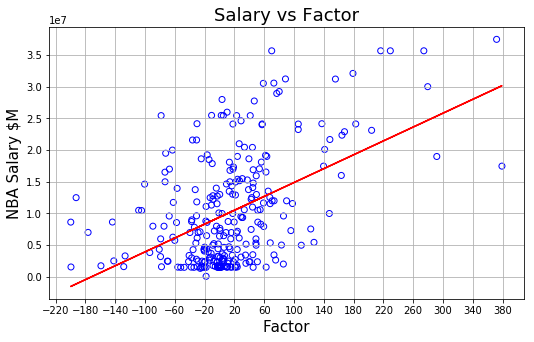

In [67]:
x = df["Factor"]
y = df["NBA Salary"]

x_axis = np.arange(-220, 420, 40)
y_axis = np.arange(0, 40000000, 5000000)

plt.scatter(x, y, facecolors = "none", edgecolors = "blue")

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-")

fig5 = plt.gcf()
fig5.set_size_inches(8.5, 5)
plt.title("Salary vs Factor", fontsize = '18')
plt.xticks(x_axis)
plt.yticks(y_axis)
plt.xlabel("Factor", fontsize = 15)
plt.ylabel("NBA Salary $M", fontsize = 15)
plt.grid()
plt.savefig("factorsalary.png")
plt.show()

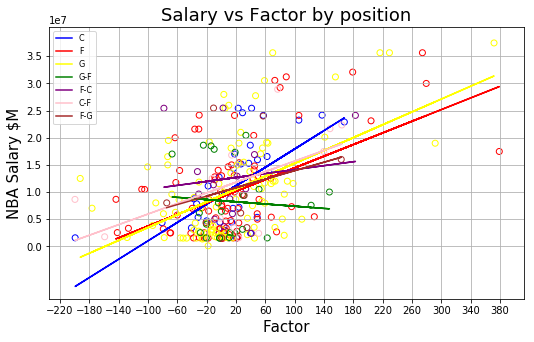

In [68]:
c = df.loc[df["Position"] == "C"]
f = df.loc[df["Position"] == "F"]
g = df.loc[df["Position"] == "G"]
gf = df.loc[df["Position"] == "G-F"]
fc = df.loc[df["Position"] == "F-C"]
cf = df.loc[df["Position"] == "C-F"]
fg = df.loc[df["Position"] == "F-G"]

x_axis = np.arange(-220, 420, 40)
y_axis = np.arange(0, 40000000, 5000000)

x1 = c["Factor"]
y1 = c["NBA Salary"] 
x2 = f["Factor"]
y2 = f["NBA Salary"]
x3 = g["Factor"]
y3 = g["NBA Salary"]
x4 = gf["Factor"]
y4 = gf["NBA Salary"]
x5 = fc["Factor"]
y5 = fc["NBA Salary"]
x6 = cf["Factor"]
y6 = cf["NBA Salary"]
x7 = fg["Factor"]
y7 = fg["NBA Salary"]

plt.scatter(x1, y1, facecolors = "none", edgecolors = "blue")
fig6 = plt.gcf()
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"b-")

ax2 = fig6.add_subplot(111)
ax2.scatter(x2, y2, facecolors = "none", edgecolors = "red")
z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)
plt.plot(x2,p2(x2),"r-")

ax3 = fig6.add_subplot(111)
ax3.scatter(x3, y3, facecolors = "none", edgecolors = "yellow")
z3 = np.polyfit(x3, y3, 1)
p3 = np.poly1d(z3)
plt.plot(x3,p3(x3),"-", color = "yellow")

ax4 = fig6.add_subplot(111)
ax4.scatter(x4, y4, facecolors = "none", edgecolors = "green")
z4 = np.polyfit(x4, y4, 1)
p4 = np.poly1d(z4)
plt.plot(x4,p4(x4),"g-") 

ax5 = fig6.add_subplot(111)
ax5.scatter(x5, y5, facecolors = "none", edgecolors = "purple")
z5 = np.polyfit(x5, y5, 1)
p5 = np.poly1d(z5)
plt.plot(x5,p5(x5),"-", color = "purple") 

ax6 = fig6.add_subplot(111)
ax6.scatter(x6, y6, facecolors = "none", edgecolors = "pink")
z6 = np.polyfit(x6, y6, 1)
p6 = np.poly1d(z6)
plt.plot(x6,p6(x6),"-", color = "pink") 

ax7 = fig6.add_subplot(111)
ax7.scatter(x7, y7, facecolors = "none", edgecolors = "brown")
z7 = np.polyfit(x7, y7, 1)
p7 = np.poly1d(z7)
plt.plot(x7,p7(x7),"-", color = "brown") 

plt.xticks(x_axis)
plt.yticks(y_axis)
plt.xlabel("Factor", fontsize = 15)
plt.ylabel("NBA Salary $M", fontsize = 15)

plt.title("Salary vs Factor by position", fontsize='18')
fig6.set_size_inches(8.5, 5)
positions = ["C", "F", "G", "G-F", "F-C", "C-F", "F-G"]
plt.legend(labels = positions, fontsize = 8)
plt.grid()
plt.savefig("factorsalarypos.png")
plt.show()

# After seeing the graph above, there seems to be a difference of Money Made vs. Factor with players that play a single position vs. players that play multiple positions. We decided to group the players that play single positions and multiple positions and to see if  the factor impacted their salary more if they were a player that played multiple positions or single positions. In other words, are single position players paid higher for their productivity vs. players that play multiple positions

In [69]:
df["Position"].replace("G-F", "Multiple Position Player", inplace=True)
df["Position"].replace("F-C", "Multiple Position Player", inplace=True)
df["Position"].replace("C-F", "Multiple Position Player", inplace=True)
df["Position"].replace("F-G", "Multiple Position Player", inplace=True)
df["Position"].replace("C", "Single Position Player", inplace=True)
df["Position"].replace("F", "Single Position Player", inplace=True)
df["Position"].replace("G", "Single Position Player", inplace=True)

In [70]:
df.head()

,Player Id,Full Name,Age,Years Pro,Position,Factor,NBA Salary
0,17,Justin Anderson,25.7,4,Multiple Position Player,-28.632562,2516048
1,49,DeAndre' Bembry,25.0,3,Multiple Position Player,10.801852,1634640
2,94,Vince Carter,42.5,21,Multiple Position Player,-2.526068,1512601
3,119,Allen Crabbe,27.3,6,Multiple Position Player,-14.052688,18500000
4,281,Damian Jones,24.0,3,Single Position Player,0.000000,1544951


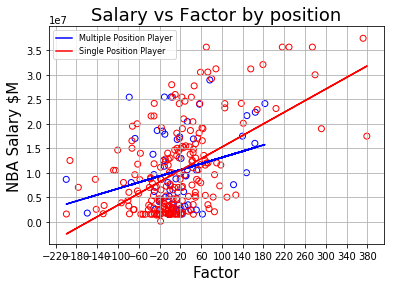

In [119]:
multiple = df.loc[df["Position"] == "Multiple Position Player"]
single = df.loc[df["Position"] == "Single Position Player"]
warnings.filterwarnings('ignore')

x1 = multiple["Factor"]
y1 = multiple["NBA Salary"] 
x2 = single["Factor"]
y2 = single["NBA Salary"]

x_axis = np.arange(-220, 420, 40)
y_axis = np.arange(0, 40000000, 5000000)

plt.scatter(x1, y1, facecolors = "none", edgecolors = "blue")
fig2 = plt.gcf()
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
plt.plot(x1,p1(x1),"b-")

ax2 = fig2.add_subplot(111)
ax2.scatter(x2, y2, facecolors = "none", edgecolors = "red")
z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)
plt.plot(x2,p2(x2),"r-")

plt.xticks(x_axis)
plt.yticks(y_axis)
plt.xlabel("Factor", fontsize = 15)
plt.ylabel("NBA Salary $M", fontsize = 15)

plt.title("Salary vs Factor by position", fontsize='18')
fig6.set_size_inches(20, 20)
positions = ["Multiple Position Player", "Single Position Player"]
plt.legend(labels = positions, fontsize = 8)
plt.grid()
plt.savefig("factorsalarypos.png")
plt.show()

In [97]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [98]:
# Create a new DataFrame that looks into multiple positions only
m_df = df.loc[df["Position"] == "Multiple Position Player"]
m_df.head()

,Player Id,Full Name,Age,Years Pro,Position,Factor,NBA Salary
0,17,Justin Anderson,25.7,4,Multiple Position Player,-28.632562,2516048
1,49,DeAndre' Bembry,25.0,3,Multiple Position Player,10.801852,1634640
2,94,Vince Carter,42.5,21,Multiple Position Player,-2.526068,1512601
3,119,Allen Crabbe,27.3,6,Multiple Position Player,-14.052688,18500000
8,521,Evan Turner,30.7,9,Multiple Position Player,-9.784861,17868853


In [101]:
# You have to create a constant variable in order to do the linear regression 
m_df['const'] = 1
m_df.head()

,Player Id,Full Name,Age,Years Pro,Position,Factor,NBA Salary,const
0,17,Justin Anderson,25.7,4,Multiple Position Player,-28.632562,2516048,1
1,49,DeAndre' Bembry,25.0,3,Multiple Position Player,10.801852,1634640,1
2,94,Vince Carter,42.5,21,Multiple Position Player,-2.526068,1512601,1
3,119,Allen Crabbe,27.3,6,Multiple Position Player,-14.052688,18500000,1
8,521,Evan Turner,30.7,9,Multiple Position Player,-9.784861,17868853,1


In [105]:
reg1 = sm.OLS(endog=m_df['NBA Salary'], exog=m_df[['const', 'Factor']], missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [106]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [107]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             NBA Salary   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     4.559
Date:                Sat, 20 Jul 2019   Prob (F-statistic):             0.0371
Time:                        11:55:17   Log-Likelihood:                -1001.1
No. Observations:                  58   AIC:                             2006.
Df Residuals:                      56   BIC:                             2010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.932e+06   1.04e+06      9.519      0.0

In [108]:
# Create a new DataFrame that looks into multiple positions only
s_df = df.loc[df["Position"] == "Single Position Player"]
s_df.head()

,Player Id,Full Name,Age,Years Pro,Position,Factor,NBA Salary
4,281,Damian Jones,24.0,3,Single Position Player,0.000000,1544951
5,313,Alex Len,26.1,6,Single Position Player,-80.858709,4350000
6,410,Jabari Parker,24.3,5,Single Position Player,-63.168730,20000000
7,412,Chandler Parsons,30.7,8,Single Position Player,17.995833,24107258
9,600,Alex Poythress,25.9,3,Single Position Player,2.886667,1544951


In [109]:
# You have to create a constant variable in order to do the linear regression 
s_df['const'] = 1
s_df.head()

,Player Id,Full Name,Age,Years Pro,Position,Factor,NBA Salary,const
4,281,Damian Jones,24.0,3,Single Position Player,0.000000,1544951,1
5,313,Alex Len,26.1,6,Single Position Player,-80.858709,4350000,1
6,410,Jabari Parker,24.3,5,Single Position Player,-63.168730,20000000,1
7,412,Chandler Parsons,30.7,8,Single Position Player,17.995833,24107258,1
9,600,Alex Poythress,25.9,3,Single Position Player,2.886667,1544951,1


In [110]:
reg2 = sm.OLS(endog=s_df['NBA Salary'], exog=s_df[['const', 'Factor']], missing='drop')
type(reg2)

statsmodels.regression.linear_model.OLS

In [113]:
results2 = reg2.fit()
type(results2)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [114]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:             NBA Salary   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     82.13
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           7.46e-17
Time:                        12:06:13   Log-Likelihood:                -3796.0
No. Observations:                 220   AIC:                             7596.
Df Residuals:                     218   BIC:                             7603.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.313e+06    5.2e+05     17.915      0.0